In [1]:
# Import relevant Libraries 
import pandas as pd
import numpy as np
import html
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import math
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer 
import re

## Task 1: Labour Employment Data Visualization

For this task as I wanted data for last 5 years, I downloaded **Labour force characteristics by industry, annual** from Statistics Canada.


Link: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410002301

In [2]:
#import files & store as dataframe
df_emp = pd.read_csv("Canada Employment Data.csv", low_memory = False)
df_emp.head()

,REF_DATE,GEO,DGUID,Labour force characteristics,North American Industry Classification System (NAICS),Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1976,Canada,2016A000011124,Labour force,"Total, all industries",Both sexes,15 years and over,Persons,249,thousands,3,v2363353,1.1.1.1.1,10491.3,NaN,NaN,NaN,1
1,1976,Canada,2016A000011124,Labour force,"Total, all industries",Both sexes,15 to 24 years,Persons,249,thousands,3,v19668072,1.1.1.1.2,2891.9,NaN,NaN,NaN,1
2,1976,Canada,2016A000011124,Labour force,"Total, all industries",Both sexes,25 to 54 years,Persons,249,thousands,3,v19668073,1.1.1.1.3,6410.7,NaN,NaN,NaN,1
3,1976,Canada,2016A000011124,Labour force,"Total, all industries",Both sexes,55 years and over,Persons,249,thousands,3,v19668074,1.1.1.1.4,1188.7,NaN,NaN,NaN,1
4,1976,Canada,2016A000011124,Labour force,"Total, all industries",Males,15 years and over,Persons,249,thousands,3,v2363523,1.1.1.2.1,6549.6,NaN,NaN,NaN,1


**Note:** For the visualizations please refer to the tableau workbook provided.

## Task 2: Job Skills Visualization

In [3]:
#import files & store as dataframe
df_jobs = pd.read_csv("job_skills.csv", low_memory = False)
df_jobs.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [4]:
# Drop empty Rows
df_jobs = df_jobs.dropna()

We need to visualize skills w.r.t. job title and industy but the skills are not readily available to us. Thus we need to extract relevant skills from noisy text columns.

In [5]:
# This function uses RegEx to remove punctuation marks, lowercase text and remove HTML characters

def preprocess(text):
    processed_feature = re.sub(r'\W', ' ', str(text)) 
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    processed_feature = processed_feature.lower()
    return processed_feature

In [6]:
# This function removes filler words i.e. stopwords

stop_words = set(stopwords.words('english'))

def rem_wrd(text):
    words = word_tokenize(text)
    wordsFiltered = []
    for w in words:
        if w not in stop_words:
            wordsFiltered.append(w)
    ' '.join(wordsFiltered)
    return wordsFiltered

In [7]:
df_jobs['Minimum Qualifications'] = df_jobs['Minimum Qualifications'].apply(lambda x: preprocess(x))
df_jobs['Preferred Qualifications'] = df_jobs['Preferred Qualifications'].apply(lambda x: preprocess(x))

In [8]:
df_jobs.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",ba bs degree or equivalent practical experienc...,experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,bs degree in an engineering discipline or equi...,bsee bsme or bsie degree experience of using s...
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,bachelor degree in business economics statisti...,experience partnering or consulting cross func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",ba bs degree in computer science or equivalent...,experience as software developer architect tec...
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,ba bs degree or equivalent practical experienc...,cts certification experience in the constructi...


Now that we have cleaned the skill columns, we can proceed with visualization.

Firstly, we are going to visualize number of jobs per category from highest to lowest. For this, I have made dictionry of category and their number of jobs.  

In [9]:
# Extract count of jobs per category and create dictionary

job_dict = df_jobs['Category'].value_counts().to_dict()
job_cat = list(job_dict.keys())
val = list(job_dict.values())
print(val,job_cat)

[168, 165, 115, 100, 98, 86, 84, 72, 59, 50, 46, 40, 31, 25, 24, 22, 16, 11, 6, 5, 5, 5, 2] ['Sales & Account Management', 'Marketing & Communications', 'Finance', 'Technical Solutions', 'Business Strategy', 'People Operations', 'User Experience & Design', 'Program Management', 'Partnerships', 'Product & Customer Support', 'Legal & Government Relations', 'Administrative', 'Sales Operations', 'Real Estate & Workplace Services', 'Software Engineering', 'Hardware Engineering', 'Manufacturing & Supply Chain', 'Technical Infrastructure', 'Network Engineering', 'Technical Writing', 'Developer Relations', 'IT & Data Management', 'Data Center & Network']


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Job Category'),
 Text(0.5, 1.0, 'Job Category Count')]

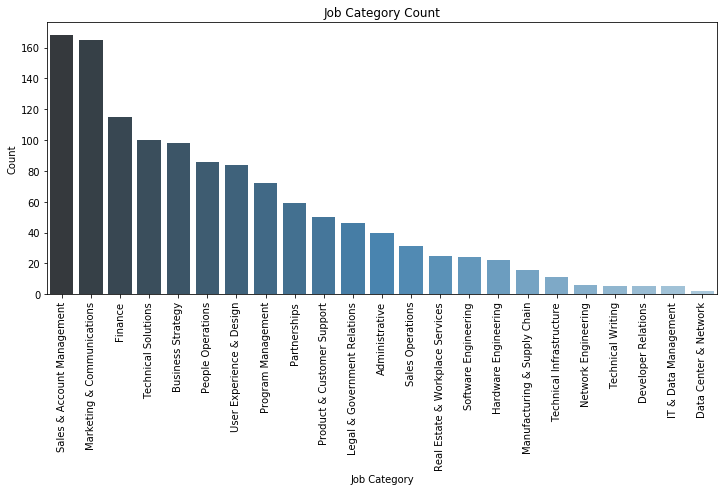

In [10]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x="Category", data=df_jobs, palette="Blues_d",order = df_jobs['Category'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set(title='Job Category Count', xlabel='Job Category', ylabel='Count');

We see that Sale and account management has highest jobs while Data Center has lowest.

Next, we are going to visualize skills with highest demand. As discussed earlier, we have already cleaned the relevant columns which have skills. Now I need to extract skills from the clean data. For this, I will use Tf-Idf. This technique tell us how important each word is inside a document. Higher the score, more important is the word. Thus, the words which appear more frequently have lower score.

Here as we can see the skills are single words like Python, Javascript as well as two words like Cloud Computing, I am using N-gram version of Tf-IDf vectorizer. I have used n-gram range as (1,2) which includes mono-gram as well as bi-gram.

In [11]:
req_skills = df_jobs['Minimum Qualifications'].tolist()
pref_skills = df_jobs['Preferred Qualifications'].tolist()
skills = req_skills + pref_skills

In [12]:
# Convert text to numerical vector, calculate Tf-Idf and select top 20 skills with highest scores
n = 20
tfidf = TfidfVectorizer(stop_words = 'english', ngram_range=(1,2))
vectors = tfidf.fit_transform(skills).toarray().flatten().tolist()
features = tfidf.get_feature_names()
tfidf_pairs = list(zip(features,vectors))
sort = sorted(tfidf_pairs, key = lambda x: x[1],reverse = True)
top_skills = pd.DataFrame(sort[:n], columns = ['skill', 'Tf-Idf'])

In [13]:
top_skills

,skill,Tf-Idf
0,computing enterprise,0.352640
1,management cloud,0.352640
2,marketing technologies,0.352640
3,program project,0.322535
4,software marketing,0.282738
5,experience program,0.241238
6,enterprise software,0.208696
7,cloud computing,0.172349
8,computing,0.171335
9,enterprise,0.168428


[Text(0, 0.5, 'Score'),
 Text(0.5, 0, 'Job Skill'),
 Text(0.5, 1.0, 'Top Skills')]

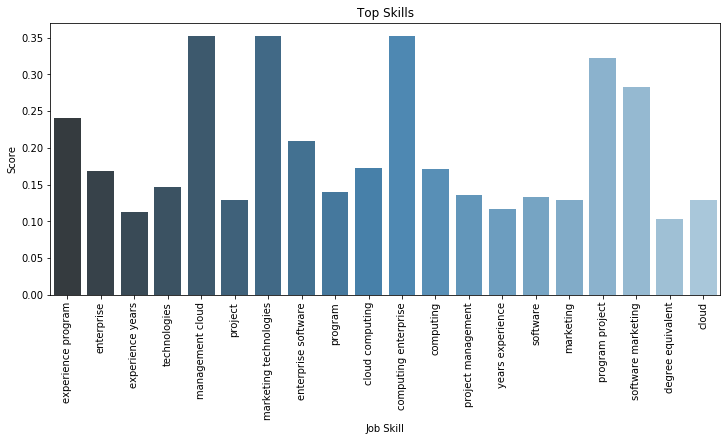

In [17]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x="skill", y="Tf-Idf",data=top_skills, palette="Blues_d",order = top_skills['skill'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set(title='Top Skills', xlabel='Job Skill', ylabel='Score');

We see that Clound computing, Enterprise Software, Project management have high scores.

Finally, we will visualize what is the most popular job title for each job category

In [39]:
#Collect job titile for each category
df = df_jobs.groupby('Category').Title

In [61]:
#make dictionary of most popular title for each job category
job_dict = {}
for name,group in df:
    job_dict[name] = group.value_counts().idxmax()
    
Most_freq_title = {'category':list(job_dict.keys()),'Most Frequent title':list(job_dict.values())}

In [62]:
df_freq_title = pd.DataFrame.from_dict(Most_freq_title)

In [63]:
df_freq_title

,category,Most Frequent title
0,Administrative,MBA Intern 2018
1,Business Strategy,"MBA Intern, Summer 2018"
2,Data Center & Network,"Program Manager, Supply Chain Data Management"
3,Developer Relations,"Developer Advocate, Partner Engineering"
4,Finance,"BOLD Intern, Summer 2018"
5,Hardware Engineering,"Supplier Development Engineer, Sensor Module"
6,IT & Data Management,"Linguist, Natural Language Understanding, Mach..."
7,Legal & Government Relations,Privacy Counsel
8,Manufacturing & Supply Chain,"Global Sourcing and Supply Manager, Camera, Co..."
9,Marketing & Communications,Business Intern 2018


## Make Data Smart

If we look at both of our datasets, the Employment data contains information about the number of people in employment force for different sector and provinces per year. The smart data would be information that has identified the peaks and valleys in those numbers over the years for each sector. 

Thus to make the data "smarter", one needs to choose the learning method which would spot the patterns in data. Thus I would choose Unsupervised Learning for data clustering.

Now, there are many unsupervised data clustering Machine Learning and Deep Learning algorithms are available, each having their own pros and cons depending on the data and application. For our dataset, I would choose Gaussian Mixture Model (GMM) Clustering Algorithm because of the following reasons:


1] Firstly, the GMM clustering algorithm is flexible when it comes to cluster covariance which means it doesn't make any assumptions about the clusters of data like K-Means. Thus even if data clusters are not spherical, which is the case in most real-world data, GMM works.


2] GMM is probabilistic algorithm and not distance-based. For each data point, it gives its probability of belonging to each cluster.


3] GMM works best even if data has outliers.... thus if we want to spot outliers, GMM works as it gives probabilities of each point being part of cluster.


4] Finally, GMM works fine for time-series analysis. Thus in case of employment data over years, GMM would work.


Example: Cluster jobs with similar qualifications/requirements.

Step 1: Exploratory Data Analysis: Understand data distribution and label distribution which will help to decide evaluation metrics. If data is unbalanced, using Accuracy is not good metrics thus we need to use precision and recall.

Step 2: Data Cleaning => Tokenize Min Qualifications, Pref Qualifications. Lowercase & remove unwanted words. This step would help to extract relevant skills words.

Step 3: Feature Engineering => Convert text data into numerical vectors. For categorical colums, one can use one-hot encoding/label encoding. Choose relevant features and drop irrelevant features like company or geographic location.

Step 4: Model Fit => Import the model, choose a initial value for number of mixture components. Fit the model on data and generate labels. 

Step 5: Hyperparameter Tuning => To get optimal value of number of mixture components, we can experiment with different values and choose the best one.